# Pytesseract | Output Formats

This notebook demonstrates some of the different outputs that pytesseract can generate.

In [1]:
from IPython.display import HTML
from PIL import Image, ImageDraw
import os
import pytesseract

## Load image using Pillow

pytesseract has good support for [Pillow](https://pypi.org/project/Pillow/), so we will use that to load our images.
Here we will be using a invoice-style document.

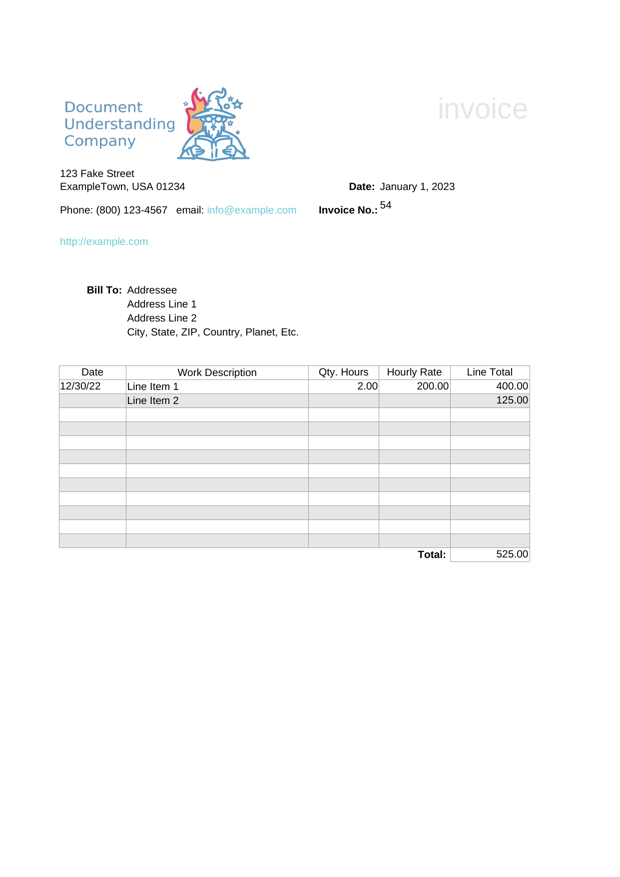

In [2]:
path = '../../../../binder-datasets/ocr/images/invoice.png'
im = Image.open(path)
w,h = im.size
display(im.resize(int(0.5*s) for s in im.size))

## Bounding box estimates

You can print out the bounding box estimates at the using ```image_to_boxes```
The output looks like the following:
```txt
D 131 1530 150 1551 0
o 153 1529 169 1546 0
c 172 1529 185 1546 0
u 190 1529 204 1545 0
m 209 1530 233 1546 0
e 214 1529 250 1551 0
n 237 1529 253 1546 0
t 257 1530 285 1550 0
```
The columns represent: 
```xml 
<symbol> <left> <bottom> <right> <top> <page>
```

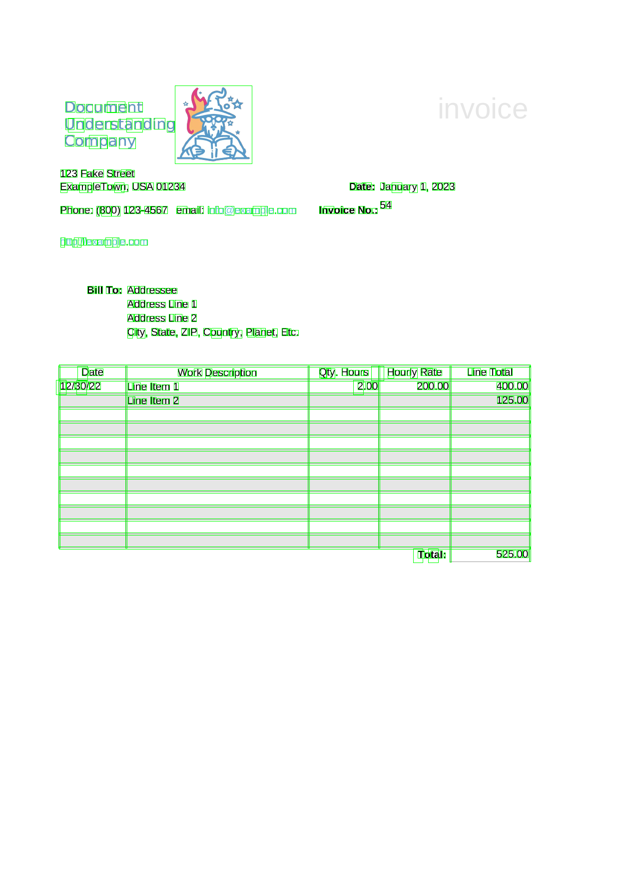

In [3]:
im_boxes = im.copy()
boxes = pytesseract.image_to_boxes(im_boxes)
draw = ImageDraw.Draw(im_boxes)
for b in boxes.splitlines():
    b = b.split(' ')
    draw.rectangle((int(b[1]), h-int(b[4]), int(b[3]), h-int(b[2])), outline=(0, 255, 0))
display(im_boxes.resize(int(0.5*s) for s in im_boxes.size))

## More verbose output

You can get more verbose output, which includes boxes, confidence, line numbers, and block numbers using ```image_to_data```.

The default output looks like the following:
```txt
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1241	1754	-1	
2	1	1	0	0	0	117	731	3	365	-1	
3	1	1	1	0	0	117	731	3	365	-1	
4	1	1	1	1	0	117	731	3	365	-1	
5	1	1	1	1	1	117	731	3	365	95	 
2	1	2	0	0	0	130	203	219	94	-1	
3	1	2	1	0	0	130	203	219	94	-1	
4	1	2	1	1	0	131	203	154	22	-1	
5	1	2	1	1	1	131	203	154	22	96	Document
4	1	2	1	2	0	131	236	218	28	-1	
5	1	2	1	2	1	131	236	218	28	96	Understanding
4	1	2	1	3	0	130	270	141	27	-1	
5	1	2	1	3	1	130	270	141	27	96	Company
```

As you can see, in Jupyter Notebook, the formatting does not print too nicely. As an alternative, you could also store this output in a ```dataframe```, which would be my preferred method.

In [4]:
df = pytesseract.image_to_data(im, output_type='data.frame')
df.head(15)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1241,1754,-1,NaN
1,2,1,1,0,0,0,117,731,3,365,-1,NaN
2,3,1,1,1,0,0,117,731,3,365,-1,NaN
3,4,1,1,1,1,0,117,731,3,365,-1,NaN
4,5,1,1,1,1,1,117,731,3,365,95,
5,2,1,2,0,0,0,130,203,219,94,-1,NaN
6,3,1,2,1,0,0,130,203,219,94,-1,NaN
7,4,1,2,1,1,0,131,203,154,22,-1,NaN
8,5,1,2,1,1,1,131,203,154,22,96,Document
9,4,1,2,1,2,0,131,236,218,28,-1,NaN


## hOCR Generation

You can generate [hOCR](http://kba.github.io/hocr-spec/1.2/) by using the ```image_to_pdf_or_hocr``` method. 

The hOCR format is based on HTML (Hypertext Markup Language) and utilizes a hierarchical structure to represent the OCR output. It includes both the recognized text and the information about the layout and positioning of the text on the page.

In [5]:
hocr = pytesseract.image_to_pdf_or_hocr(im, extension='hocr').decode('utf-8')
print(hocr)

<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
 <head>
  <title></title>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
  <meta name='ocr-system' content='tesseract 4.1.1' />
  <meta name='ocr-capabilities' content='ocr_page ocr_carea ocr_par ocr_line ocrx_word ocrp_wconf'/>
 </head>
 <body>
  <div class='ocr_page' id='page_1' title='image "/tmp/tess_xg26dzom_input.PNG"; bbox 0 0 1241 1754; ppageno 0'>
   <div class='ocr_carea' id='block_1_1' title="bbox 117 731 120 1096">
    <p class='ocr_par' id='par_1_1' lang='eng' title="bbox 117 731 120 1096">
     <span class='ocr_line' id='line_1_1' title="bbox 117 731 120 1096; baseline 0 0; x_size 182.5; x_descenders -91.25; x_ascenders 91.25">
      <span class='ocrx_word' id='word_1_1' title='bbox 117 731 120 1096; x_wconf 95'> </span>

You can also display HTML in Jupyter Notebook; however, there are [much better hOCR viewers for browsers](https://github.com/kba/hocrjs).

In [6]:
display(HTML(hocr))

## ALTO XML

You can generate ALTO XML using the ```image_to_alto_xml```.

From [Wikipedia](https://en.wikipedia.org/wiki/ALTO_(XML)): 

>ALTO (Analyzed Layout and Text Object) is an open XML Schema developed by the EU-funded project called METAe.

>The standard was initially developed for the description of text OCR and layout information of pages for digitized material. The goal was to describe the layout and text in a form to be able to reconstruct the original appearance based on the digitized information - similar to the approach of a lossless image saving operation. 

In [7]:
xml = pytesseract.image_to_alto_xml(im).decode('utf-8')
print(xml)

<?xml version="1.0" encoding="UTF-8"?>
<alto xmlns="http://www.loc.gov/standards/alto/ns-v3#" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.loc.gov/standards/alto/ns-v3# http://www.loc.gov/alto/v3/alto-3-0.xsd">
	<Description>
		<MeasurementUnit>pixel</MeasurementUnit>
		<sourceImageInformation>
			<fileName></fileName>
		</sourceImageInformation>
		<OCRProcessing ID="OCR_0">
			<ocrProcessingStep>
				<processingSoftware>
					<softwareName>tesseract 4.1.1</softwareName>
				</processingSoftware>
			</ocrProcessingStep>
		</OCRProcessing>
	</Description>
	<Layout>
		<Page WIDTH="1241" HEIGHT="1754" PHYSICAL_IMG_NR="0" ID="page_0">
			<PrintSpace HPOS="0" VPOS="0" WIDTH="1241" HEIGHT="1754">
				<ComposedBlock ID="cblock_0" HPOS="117" VPOS="731" WIDTH="3" HEIGHT="365">
					<TextBlock ID="block_0" HPOS="117" VPOS="731" WIDTH="3" HEIGHT="365">
						<TextLine ID="line_0" HPOS="117" VPOS="731" WIDTH="3" HEI

## Searchable PDF

You can generate searchable PDFs using the ```image_to_pdf_or_hocr```.

Searchable PDFs add the extracted text layer to the PDF for search capabilities.

In [8]:
pdf = pytesseract.image_to_pdf_or_hocr(im, extension='pdf')
with open('example.pdf', 'w+b') as f:
    f.write(pdf)